This notebook is to find the statistics of the EUV wave in SUVI and LASCO C2/C3

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import glob
import numpy as np
# np.set_printoptions(precision=2)  # For compact display
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator
import sunpy.sun.constants as const
import sys
# Construct the full path to the scripts directory
script_path = os.path.abspath('./scripts')

# Add the scripts directory to sys.path
if script_path not in sys.path:
    sys.path.append(script_path)

import solar_data_utils as myfuncs
# Reload to update with new changes
import importlib
importlib.reload(myfuncs)

data_dir = '/home/mnedal/data'

In [2]:
suvi_filenames = sorted(glob.glob(f'{data_dir}/jplots/suvi/clicking/*.csv'))
c2_filenames   = sorted(glob.glob(f'{data_dir}/jplots/lasco_C2/clicking/*.csv'))
c3_filenames   = sorted(glob.glob(f'{data_dir}/jplots/lasco_C3/clicking/*.csv'))

print(len(suvi_filenames), len(c2_filenames), len(c3_filenames))

13 16 13


In [3]:
slits = myfuncs.generate_centered_list(160, 2, 6)
print(slits, '--> Length:', len(slits))

[148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172] --> Length: 13


In [4]:
# Filter filenames based on the slit number
suvi_filenames = [
    filename for filename in suvi_filenames 
    if any(filename.endswith(f'slit_{n}.csv') for n in slits)
]

c2_filenames = [
    filename for filename in c2_filenames 
    if any(filename.endswith(f'slit_{n}.csv') for n in slits)
]

c3_filenames = [
    filename for filename in c3_filenames 
    if any(filename.endswith(f'slit_{n}.csv') for n in slits)
]

print(len(suvi_filenames), len(c2_filenames), len(c3_filenames))

# get the radius of the Sun in km
sun_radius_km = const.radius.to('km').value

13 13 13


In [236]:
c3_filenames

['/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_148.csv',
 '/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_150.csv',
 '/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_152.csv',
 '/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_154.csv',
 '/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_156.csv',
 '/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_158.csv',
 '/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_160.csv',
 '/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_162.csv',
 '/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_164.csv',
 '/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_166.csv',
 '/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_168.csv',
 '/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_170.csv',
 '/h

In [5]:
all_speeds_suvi  = []
all_accels_suvi  = []
all_times_suvi   = []
all_dists_suvi   = []
for file in suvi_filenames:
    df = pd.read_csv(file)
    df['speed_diff'] = df['speed_km_s'].diff()
    # calculate the Accel. in m/s2
    df['accel_m_s2'] = (df['speed_diff']*1e3) / df['time_diff_s']
    # store all speed and accels.
    all_speeds_suvi.append(df['speed_km_s'].values)
    all_accels_suvi.append(df['accel_m_s2'].values)
    all_times_suvi.append(df['time'].values)
    all_dists_suvi.append(df['distance_km'].values/sun_radius_km)
    # print(f"Max: {np.nanmax(df['distance_km'].values/sun_radius_km):.2f} Rs")
    # print(f"Min: {np.nanmin(df['distance_km'].values/sun_radius_km):.2f} Rs\n")

Start height: 1.17 Rs
End height:  1.92 Rs

Start time: 2024-05-14 17:12:35
End time:  2024-05-14 17:37:02


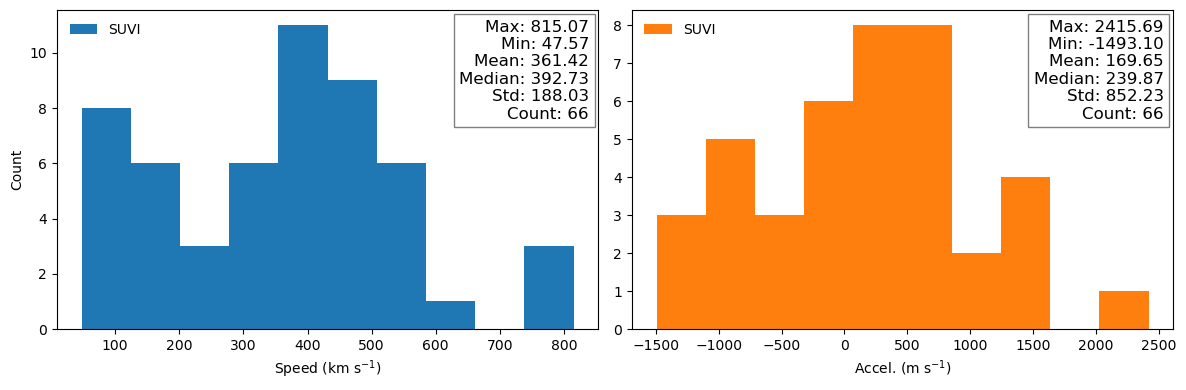

In [6]:
# Combine the 1D arrays into a single 1D array
combined_array_v = np.concatenate(all_speeds_suvi)
combined_array_a = np.concatenate(all_accels_suvi)
combined_array_t = np.concatenate(all_times_suvi)
combined_array_d = np.concatenate(all_dists_suvi)

# Calculate basic statistics
max_v    = np.nanmax(combined_array_v)
min_v    = np.nanmin(combined_array_v)
mean_v   = np.nanmean(combined_array_v)
median_v = np.nanmedian(combined_array_v)
std_v    = np.nanstd(combined_array_v)
count_v  = combined_array_v.size

max_a    = np.nanmax(combined_array_a)
min_a    = np.nanmin(combined_array_a)
mean_a   = np.nanmean(combined_array_a)
median_a = np.nanmedian(combined_array_a)
std_a    = np.nanstd(combined_array_a)
count_a  = combined_array_a.size

max_d = np.nanmax(combined_array_d)
min_d = np.nanmin(combined_array_d)
print(f"Start height: {min_d:.2f} Rs")
print(f"End height:  {max_d:.2f} Rs")

max_t = datetime.strftime(mdates.num2date(np.nanmax(combined_array_t)), '%Y-%m-%d %H:%M:%S')
min_t = datetime.strftime(mdates.num2date(np.nanmin(combined_array_t)), '%Y-%m-%d %H:%M:%S')
print(f"\nStart time: {min_t}")
print(f"End time:  {max_t}")

# Plot a histogram of the combined data
fig = plt.figure(figsize=[12,4])

ax = fig.add_subplot(121)
ax.hist(combined_array_v, bins=10, color='tab:blue', label='SUVI',
         # edgecolor='black'
        )
ax.set_xlabel(r'Speed (km s$^{-1}$)')
ax.set_ylabel('Count')
ax.legend(loc='upper left', frameon=False)
# Add statistics to the top-right corner of the plot
stats_text_v = f'Max: {max_v:.2f}\nMin: {min_v:.2f}\nMean: {mean_v:.2f}\nMedian: {median_v:.2f}\nStd: {std_v:.2f}\nCount: {count_v}'
ax.text(0.983, 0.97, stats_text_v, transform=ax.transAxes, fontsize=12,
         verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))

ax = fig.add_subplot(122)
ax.hist(combined_array_a, bins=10, color='tab:orange', label='SUVI')
ax.set_xlabel(r'Accel. (m s$^{-1}$)')
ax.legend(loc='upper left', frameon=False)
# Add statistics to the top-right corner of the plot
stats_text_a = f'Max: {max_a:.2f}\nMin: {min_a:.2f}\nMean: {mean_a:.2f}\nMedian: {median_a:.2f}\nStd: {std_a:.2f}\nCount: {count_a}'
ax.text(0.983, 0.97, stats_text_a, transform=ax.transAxes, fontsize=12,
         verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))

fig.tight_layout()
# fig.savefig(f'{data_dir}/euv_stats_suvi.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [7]:
all_speeds_c2 = []
all_accels_c2 = []
all_times_c2  = []
all_dists_c2  = []
for file in c2_filenames:
    df = pd.read_csv(file)
    df['speed_diff'] = df['speed_km_s'].diff()
    # calculate the Accel. in m/s2
    df['accel_m_s2'] = (df['speed_diff']*1e3) / df['time_diff_s']
    # store all speed and accels.
    all_speeds_c2.append(df['speed_km_s'].values)
    all_accels_c2.append(df['accel_m_s2'].values)
    all_times_c2.append(df['time'].values)
    all_dists_c2.append(df['distance_km'].values/sun_radius_km)

Start height: 2.78 Rs
End height:  7.08 Rs

Start time: 2024-05-14 17:47:53
End time:  2024-05-14 18:24:36


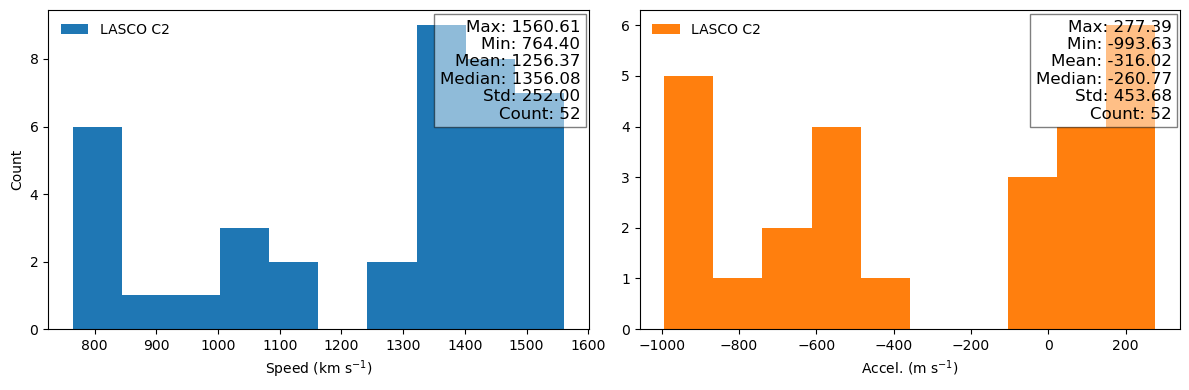

In [8]:
# Combine the 1D arrays into a single 1D array
combined_array_v = np.concatenate(all_speeds_c2)
combined_array_a = np.concatenate(all_accels_c2)
combined_array_t = np.concatenate(all_times_c2)
combined_array_d = np.concatenate(all_dists_c2)

# Calculate basic statistics
max_v    = np.nanmax(combined_array_v)
min_v    = np.nanmin(combined_array_v)
mean_v   = np.nanmean(combined_array_v)
median_v = np.nanmedian(combined_array_v)
std_v    = np.nanstd(combined_array_v)
count_v  = combined_array_v.size

max_a    = np.nanmax(combined_array_a)
min_a    = np.nanmin(combined_array_a)
mean_a   = np.nanmean(combined_array_a)
median_a = np.nanmedian(combined_array_a)
std_a    = np.nanstd(combined_array_a)
count_a  = combined_array_a.size

max_d = np.nanmax(combined_array_d)
min_d = np.nanmin(combined_array_d)
print(f"Start height: {min_d:.2f} Rs")
print(f"End height:  {max_d:.2f} Rs")

max_t = datetime.strftime(mdates.num2date(np.nanmax(combined_array_t)), '%Y-%m-%d %H:%M:%S')
min_t = datetime.strftime(mdates.num2date(np.nanmin(combined_array_t)), '%Y-%m-%d %H:%M:%S')
print(f"\nStart time: {min_t}")
print(f"End time:  {max_t}")

# Plot a histogram of the combined data
fig = plt.figure(figsize=[12,4])

ax = fig.add_subplot(121)
ax.hist(combined_array_v, bins=10, color='tab:blue', label='LASCO C2',
         # edgecolor='black'
        )
ax.set_xlabel(r'Speed (km s$^{-1}$)')
ax.set_ylabel('Count')
ax.legend(loc='upper left', frameon=False)
# Add statistics to the top-right corner of the plot
stats_text_v = f'Max: {max_v:.2f}\nMin: {min_v:.2f}\nMean: {mean_v:.2f}\nMedian: {median_v:.2f}\nStd: {std_v:.2f}\nCount: {count_v}'
ax.text(0.985, 0.97, stats_text_v, transform=ax.transAxes, fontsize=12,
         verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))

ax = fig.add_subplot(122)
ax.hist(combined_array_a, bins=10, color='tab:orange', label='LASCO C2')
ax.set_xlabel(r'Accel. (m s$^{-1}$)')
ax.legend(loc='upper left', frameon=False)
# Add statistics to the top-right corner of the plot
stats_text_a = f'Max: {max_a:.2f}\nMin: {min_a:.2f}\nMean: {mean_a:.2f}\nMedian: {median_a:.2f}\nStd: {std_a:.2f}\nCount: {count_a}'
ax.text(0.985, 0.97, stats_text_a, transform=ax.transAxes, fontsize=12,
         verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))

fig.tight_layout()
# fig.savefig(f'{data_dir}/euv_stats_c2.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [9]:
all_speeds_c3 = []
all_accels_c3 = []
all_times_c3  = []
all_dists_c3  = []
for file in c3_filenames:
    df = pd.read_csv(file)
    df['speed_diff'] = df['speed_km_s'].diff()
    # calculate the Accel. in m/s2
    df['accel_m_s2'] = (df['speed_diff']*1e3) / df['time_diff_s']
    # store all speed and accels.
    all_speeds_c3.append(df['speed_km_s'].values)
    all_accels_c3.append(df['accel_m_s2'].values)
    all_times_c3.append(df['time'].values)
    all_dists_c3.append(df['distance_km'].values/sun_radius_km)

Start height: 4.00 Rs
End height:  30.55 Rs

Start time: 2024-05-14 17:53:52
End time:  2024-05-14 23:01:39


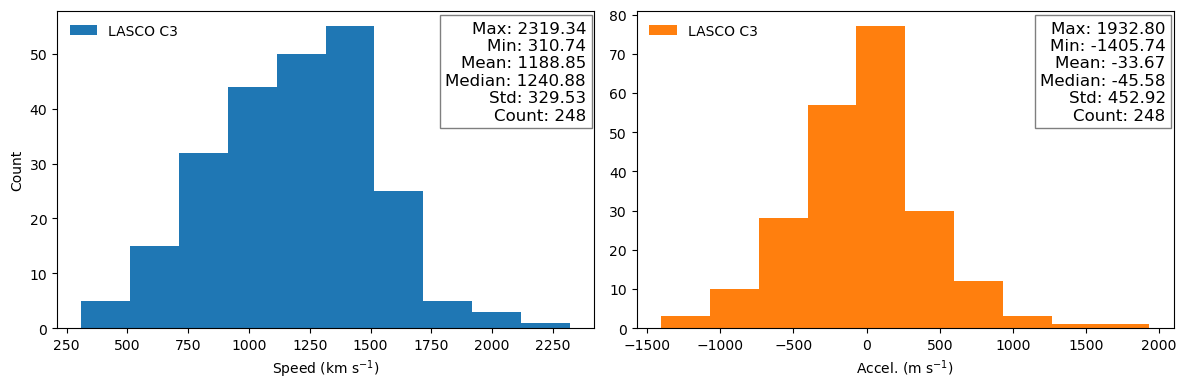

In [10]:
# Combine the 1D arrays into a single 1D array
combined_array_v = np.concatenate(all_speeds_c3)
combined_array_a = np.concatenate(all_accels_c3)
combined_array_t = np.concatenate(all_times_c3)
combined_array_d = np.concatenate(all_dists_c3)

# Calculate basic statistics
max_v    = np.nanmax(combined_array_v)
min_v    = np.nanmin(combined_array_v)
mean_v   = np.nanmean(combined_array_v)
median_v = np.nanmedian(combined_array_v)
std_v    = np.nanstd(combined_array_v)
count_v  = combined_array_v.size

max_a    = np.nanmax(combined_array_a)
min_a    = np.nanmin(combined_array_a)
mean_a   = np.nanmean(combined_array_a)
median_a = np.nanmedian(combined_array_a)
std_a    = np.nanstd(combined_array_a)
count_a  = combined_array_a.size

max_d = np.nanmax(combined_array_d)
min_d = np.nanmin(combined_array_d)
print(f"Start height: {min_d:.2f} Rs")
print(f"End height:  {max_d:.2f} Rs")

max_t = datetime.strftime(mdates.num2date(np.nanmax(combined_array_t)), '%Y-%m-%d %H:%M:%S')
min_t = datetime.strftime(mdates.num2date(np.nanmin(combined_array_t)), '%Y-%m-%d %H:%M:%S')
print(f"\nStart time: {min_t}")
print(f"End time:  {max_t}")

# Plot a histogram of the combined data
fig = plt.figure(figsize=[12,4])

ax = fig.add_subplot(121)
ax.hist(combined_array_v, bins=10, color='tab:blue', label='LASCO C3')
ax.set_xlabel(r'Speed (km s$^{-1}$)')
ax.set_ylabel('Count')
ax.legend(loc='upper left', frameon=False)
# Add statistics to the top-right corner of the plot
stats_text_v = f'Max: {max_v:.2f}\nMin: {min_v:.2f}\nMean: {mean_v:.2f}\nMedian: {median_v:.2f}\nStd: {std_v:.2f}\nCount: {count_v}'
ax.text(0.985, 0.97, stats_text_v, transform=ax.transAxes, fontsize=12,
         verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))

ax = fig.add_subplot(122)
ax.hist(combined_array_a, bins=10, color='tab:orange', label='LASCO C3')
ax.set_xlabel(r'Accel. (m s$^{-1}$)')
ax.legend(loc='upper left', frameon=False)
# Add statistics to the top-right corner of the plot
stats_text_a = f'Max: {max_a:.2f}\nMin: {min_a:.2f}\nMean: {mean_a:.2f}\nMedian: {median_a:.2f}\nStd: {std_a:.2f}\nCount: {count_a}'
ax.text(0.985, 0.97, stats_text_a, transform=ax.transAxes, fontsize=12,
         verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))

fig.tight_layout()
# fig.savefig(f'{data_dir}/euv_stats_c3.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [214]:
# SUVI, LASCO C2, LASCO C3
# suvi_filenames, c2_filenames, c3_filenames
instrument_name = 'LASCO C3'
instrument_files = c3_filenames

Inspect individual instrument files

In [178]:
# df = pd.read_csv(instrument_files[0])
# df['speed_diff'] = df['speed_km_s'].diff()
# df['accel_m_s2'] = (df['speed_diff']*1e3) / df['time_diff_s'] # calculate the Accel. in m/s2
# print(instrument_files[0])
# display(df.head())

# angle = instrument_files[0].split('_')[-1][:-4]
# speed = df['speed_km_s']
# accel = df['accel_m_s2']

# # Calculate basic statistics
# max_v    = np.nanmax(speed)
# min_v    = np.nanmin(speed)
# mean_v   = np.nanmean(speed)
# median_v = np.nanmedian(speed)
# std_v    = np.nanstd(speed)
# count_v  = speed.size

# max_a    = np.nanmax(accel)
# min_a    = np.nanmin(accel)
# mean_a   = np.nanmean(accel)
# median_a = np.nanmedian(accel)
# std_a    = np.nanstd(accel)
# count_a  = accel.size

# bins = 10
# fig = plt.figure(figsize=[12,4])

# ax = fig.add_subplot(121)
# ax.hist(speed, bins=bins, color='dodgerblue', label=rf'SUVI: {angle}$^o$')
# ax.set_xlabel(r'Speed (km s$^{-1}$)')
# ax.set_ylabel('Count')
# ax.legend(loc='upper left', frameon=False)
# stats_text_v = f'Max: {max_v:.2f}\nMin: {min_v:.2f}\nMean: {mean_v:.2f}\nMedian: {median_v:.2f}\nStd: {std_v:.2f}\nCount: {count_v}'
# ax.text(0.985, 0.97, stats_text_v, transform=ax.transAxes, fontsize=12,
#          verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))

# ax = fig.add_subplot(122)
# ax.hist(accel, bins=bins, color='crimson', label=rf'{instrument_name}: {angle}$^o$')
# ax.set_xlabel(r'Accel. (m s$^{-1}$)')
# ax.legend(loc='upper left', frameon=False)
# stats_text_a = f'Max: {max_a:.2f}\nMin: {min_a:.2f}\nMean: {mean_a:.2f}\nMedian: {median_a:.2f}\nStd: {std_a:.2f}\nCount: {count_a}'
# ax.text(0.985, 0.97, stats_text_a, transform=ax.transAxes, fontsize=12,
#          verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))
# fig.tight_layout()
# plt.show()

Plot all slits in the instrument FOV

In [257]:
instrument_files

['/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_148.csv',
 '/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_150.csv',
 '/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_152.csv',
 '/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_154.csv',
 '/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_156.csv',
 '/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_158.csv',
 '/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_160.csv',
 '/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_162.csv',
 '/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_164.csv',
 '/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_166.csv',
 '/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_168.csv',
 '/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_170.csv',
 '/h

In [216]:
file = instrument_files[0]
df = pd.read_csv(file)
df.head()

,Unnamed: 0,time,distance,distance_km,distance_diff_km,datetime,time_diff_s,speed_km_s
0,0,19857.753933,4693.726809,3.440985e+06,NaN,2024-05-14 18:05:39.809924+00:00,NaN,NaN
1,1,19857.762375,6160.146104,4.516022e+06,1.075036e+06,2024-05-14 18:17:49.192020+00:00,729.382096,1473.900139
2,2,19857.770753,7587.975417,5.562767e+06,1.046746e+06,2024-05-14 18:29:53.048494+00:00,723.856474,1446.068357
3,3,19857.778747,9035.099722,6.623659e+06,1.060891e+06,2024-05-14 18:41:23.751236+00:00,690.702742,1535.959093
4,4,19857.787253,10250.684137,7.514807e+06,8.911486e+05,2024-05-14 18:53:38.658953+00:00,734.907717,1212.599285


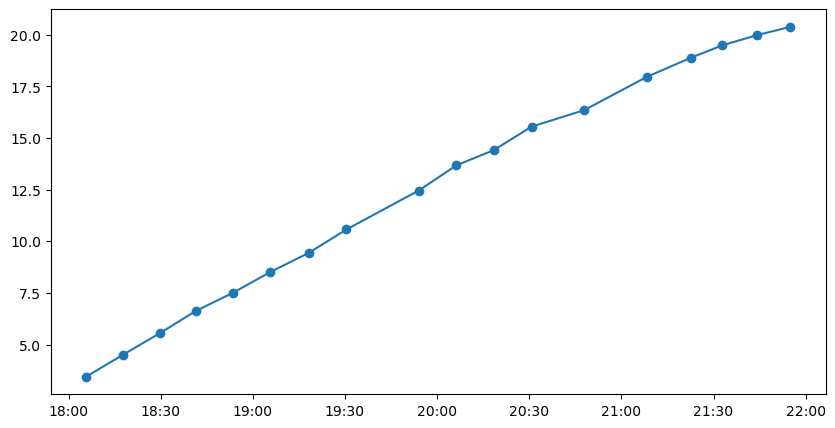

In [235]:
fig, ax = plt.subplots(figsize=[10,5])
ax.plot(df['time'], df['distance_km']/1e6, '-o')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.show()

In [222]:
import numpy as np
from scipy.signal import savgol_filter
x = np.array([2, 2, 5, 2, 1, 0, 1, 4, 9])
savgol_filter(x, 5, 2)
# savgol_filter(x, 5, 2, mode='nearest')

array([1.66, 3.17, 3.54, 2.86, 0.66, 0.17, 1.  , 4.  , 9.  ])

In [250]:
x = df['time']
y = df['distance_km']

y

0     3.440985e+06
1     4.516022e+06
2     5.562767e+06
3     6.623659e+06
4     7.514807e+06
5     8.504972e+06
6     9.431484e+06
7     1.057017e+07
8     1.245149e+07
9     1.367505e+07
10    1.441060e+07
11    1.554929e+07
12    1.634142e+07
13    1.796105e+07
14    1.888756e+07
15    1.948166e+07
16    1.997674e+07
17    2.037988e+07
Name: distance_km, dtype: float64

In [251]:
y[0]

3440985.167323776

In [252]:
y[0]/const.radius.to('km').value

4.946076135293627

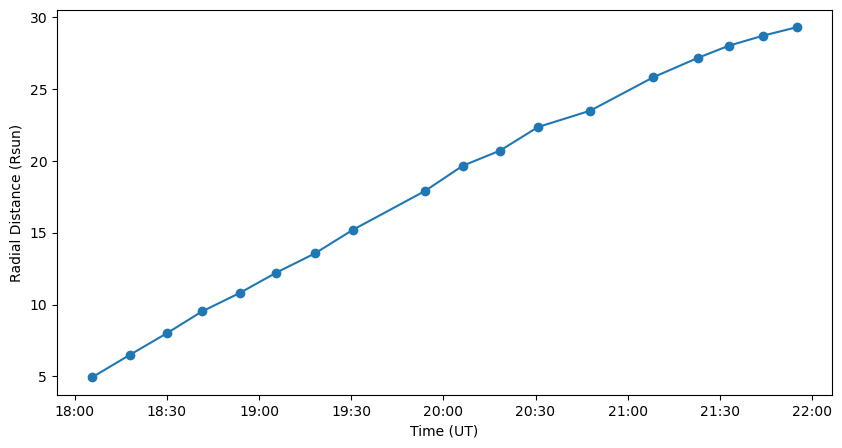

In [259]:
ig, ax = plt.subplots(figsize=[10,5])
ax.plot(x, y/const.radius.to('km').value, '-o')
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Radial Distance (Rsun)')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.show()

In [264]:
np.array(x), np.array(y)

(array([19857.75, 19857.76, 19857.77, 19857.78, 19857.79, 19857.8 ,
        19857.8 , 19857.81, 19857.83, 19857.84, 19857.85, 19857.85,
        19857.87, 19857.88, 19857.89, 19857.9 , 19857.91, 19857.91]),
 array([ 3440985.17,  4516021.54,  5562767.48,  6623658.64,  7514807.21,
         8504972.29,  9431483.9 , 10570173.74, 12451487.4 , 13675048.53,
        14410599.73, 15549289.58, 16341421.64, 17961048.81, 18887560.42,
        19481659.47, 19976742.01, 20379880.65]))

In [268]:
[datetime.datetime.num2date(date) for date in x]

AttributeError: type object 'datetime.datetime' has no attribute 'datetime'

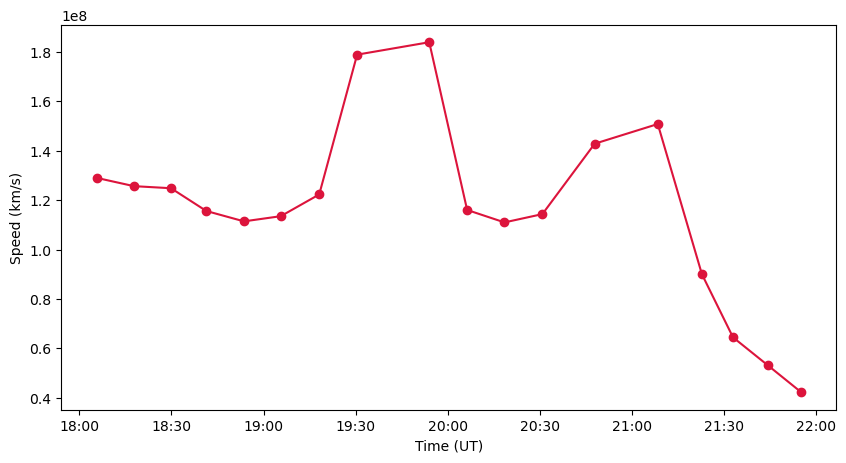

In [262]:
# speed = savgol_filter(y/const.radius.to('km').value, window_length=3, polyorder=2, deriv=1, delta = x[1]-x[0])
speed = savgol_filter(y, window_length=3, polyorder=2, deriv=1, delta = x[1]-x[0])

fig, ax = plt.subplots(figsize=[10,5])
ax.plot(df['time'], speed, '-o', color='crimson')
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Speed (km/s)')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.show()

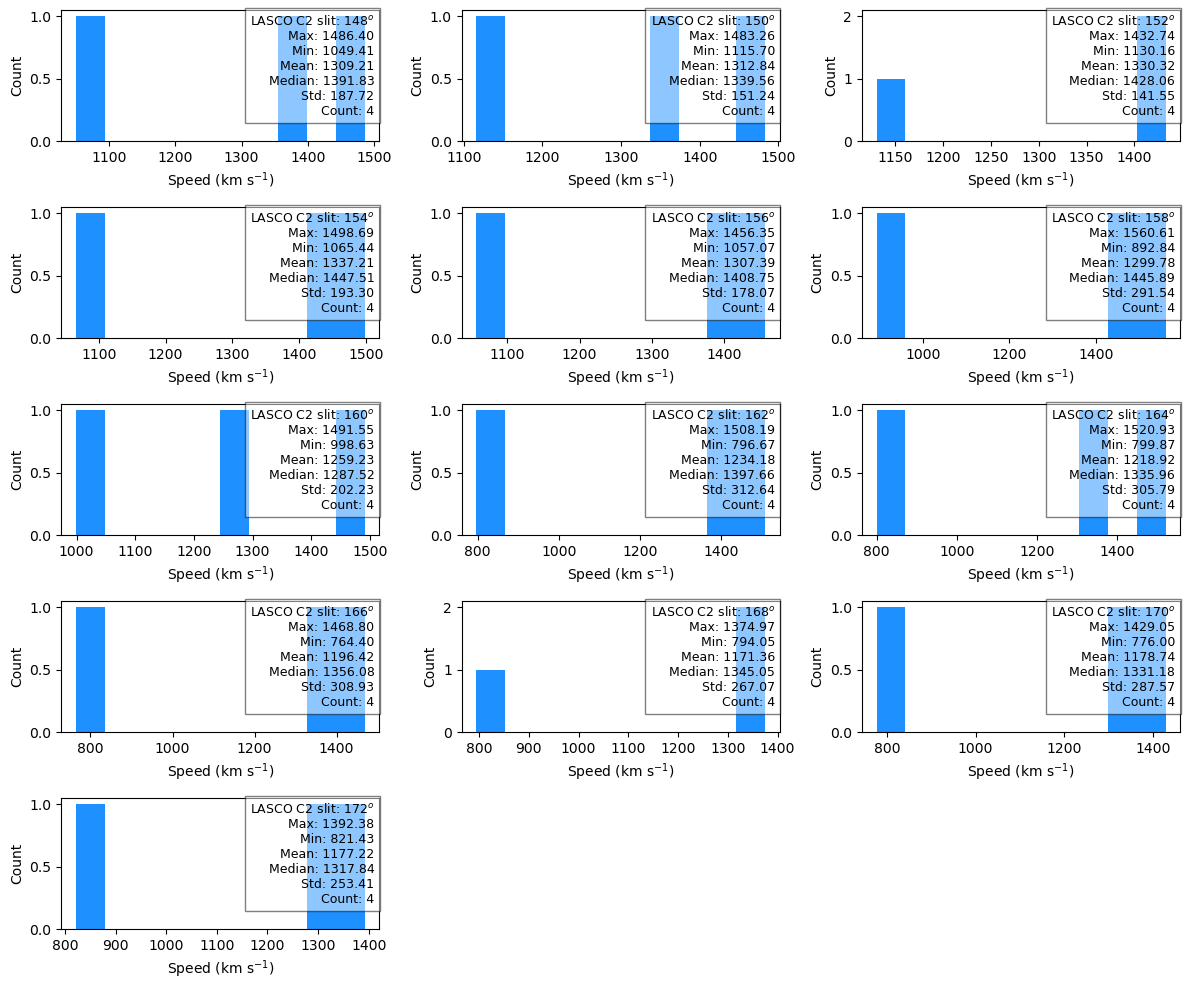

In [179]:
num_files = len(instrument_files)
cols = 3  # Number of columns in the figure
rows = (num_files // cols) + (num_files % cols > 0)  # Auto-calculate the required number of rows
bins = 10
fig, axes = plt.subplots(rows, cols, figsize=(12, 2 * rows))  # Make a grid of subplots
axes = axes.flatten()  # Flatten in case of a 2D array of axes

for i, file in enumerate(instrument_files):
    df = pd.read_csv(file)
    angle = file.split('_')[-1][:-4]
    speed = df['speed_km_s']
    
    # Calculate statistics
    max_v = np.nanmax(speed)
    min_v = np.nanmin(speed)
    mean_v = np.nanmean(speed)
    median_v = np.nanmedian(speed)
    std_v = np.nanstd(speed)
    count_v = speed.size
    
    ax = axes[i]  # Use the i-th subplot
    ax.hist(speed, bins=bins, color='dodgerblue')
    ax.set_xlabel(r'Speed (km s$^{-1}$)')
    ax.set_ylabel('Count')
    ax.legend(loc='upper left', frameon=False)
    
    stats_text_v = f'{instrument_name} slit: {angle}$^o$\nMax: {max_v:.2f}\nMin: {min_v:.2f}\nMean: {mean_v:.2f}\nMedian: {median_v:.2f}\nStd: {std_v:.2f}\nCount: {count_v}'
    ax.text(0.985, 0.97, stats_text_v, transform=ax.transAxes, fontsize=9,
             verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))

# Hide unused subplots if `num_files` is not a multiple of `cols`
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()

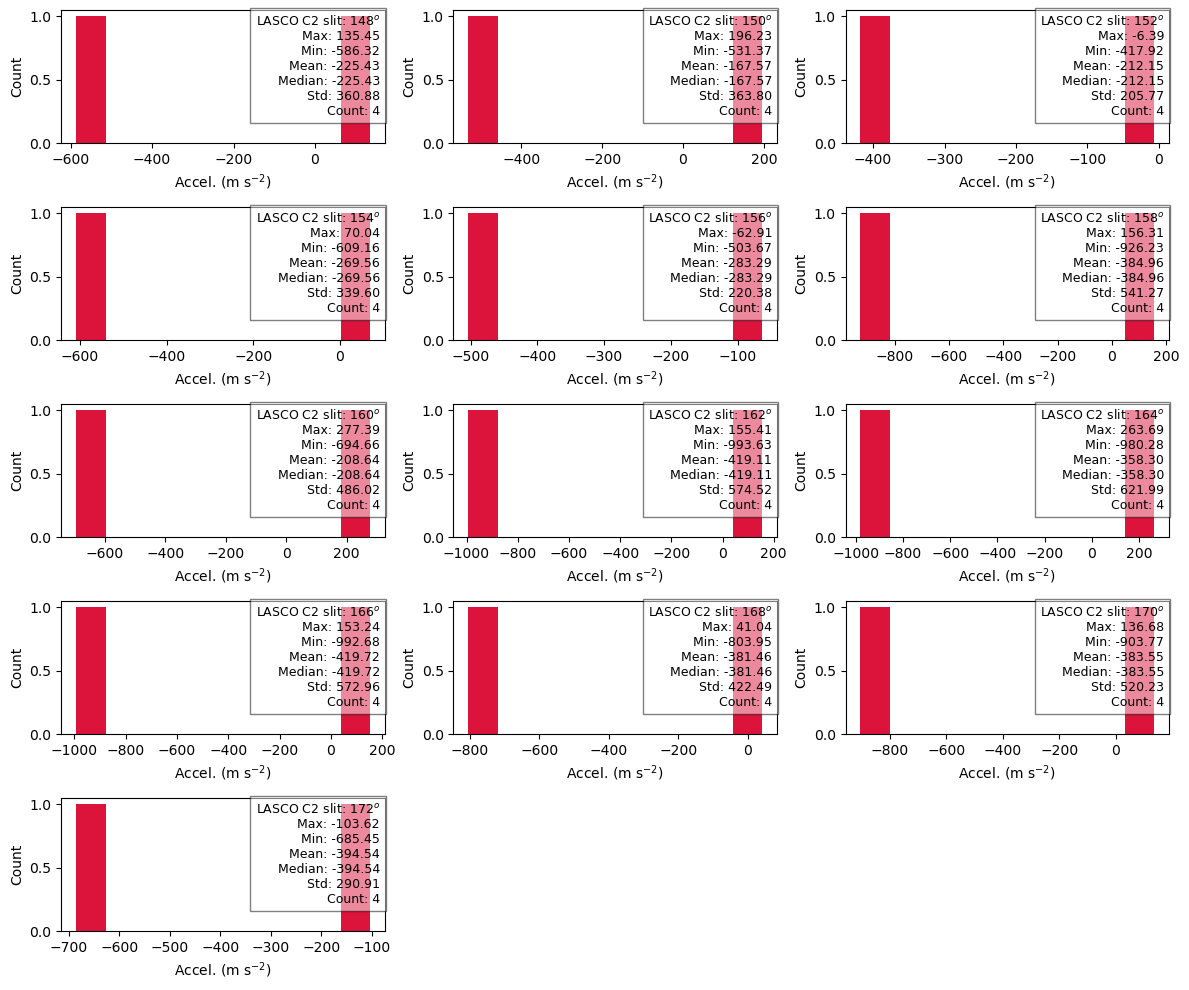

In [180]:
num_files = len(instrument_files)
cols = 3  # Number of columns in the figure
rows = (num_files // cols) + (num_files % cols > 0)  # Auto-calculate the required number of rows
bins = 10
fig, axes = plt.subplots(rows, cols, figsize=(12, 2 * rows))  # Make a grid of subplots
axes = axes.flatten()  # Flatten in case of a 2D array of axes

for i, file in enumerate(instrument_files):
    df = pd.read_csv(file)
    df['speed_diff'] = df['speed_km_s'].diff()
    df['accel_m_s2'] = (df['speed_diff'] * 1e3) / df['time_diff_s']  # Acceleration in m/s²

    angle = file.split('_')[-1][:-4]
    accel = df['accel_m_s2']
    
    # Calculate statistics
    max_a    = np.nanmax(accel)
    min_a    = np.nanmin(accel)
    mean_a   = np.nanmean(accel)
    median_a = np.nanmedian(accel)
    std_a    = np.nanstd(accel)
    count_a  = accel.size
    
    ax = axes[i]  # Use the i-th subplot
    ax.hist(accel, bins=bins, color='crimson')
    ax.set_xlabel(r'Accel. (m s$^{-2}$)')
    ax.set_ylabel('Count')
    ax.legend(loc='upper left', frameon=False)
    
    stats_text_a = f'{instrument_name} slit: {angle}$^o$\nMax: {max_a:.2f}\nMin: {min_a:.2f}\nMean: {mean_a:.2f}\nMedian: {median_a:.2f}\nStd: {std_a:.2f}\nCount: {count_a}'
    ax.text(0.985, 0.97, stats_text_a, transform=ax.transAxes, fontsize=9,
             verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))

# Hide unused subplots if `num_files` is not a multiple of `cols`
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()

Plot speeds and accel time series

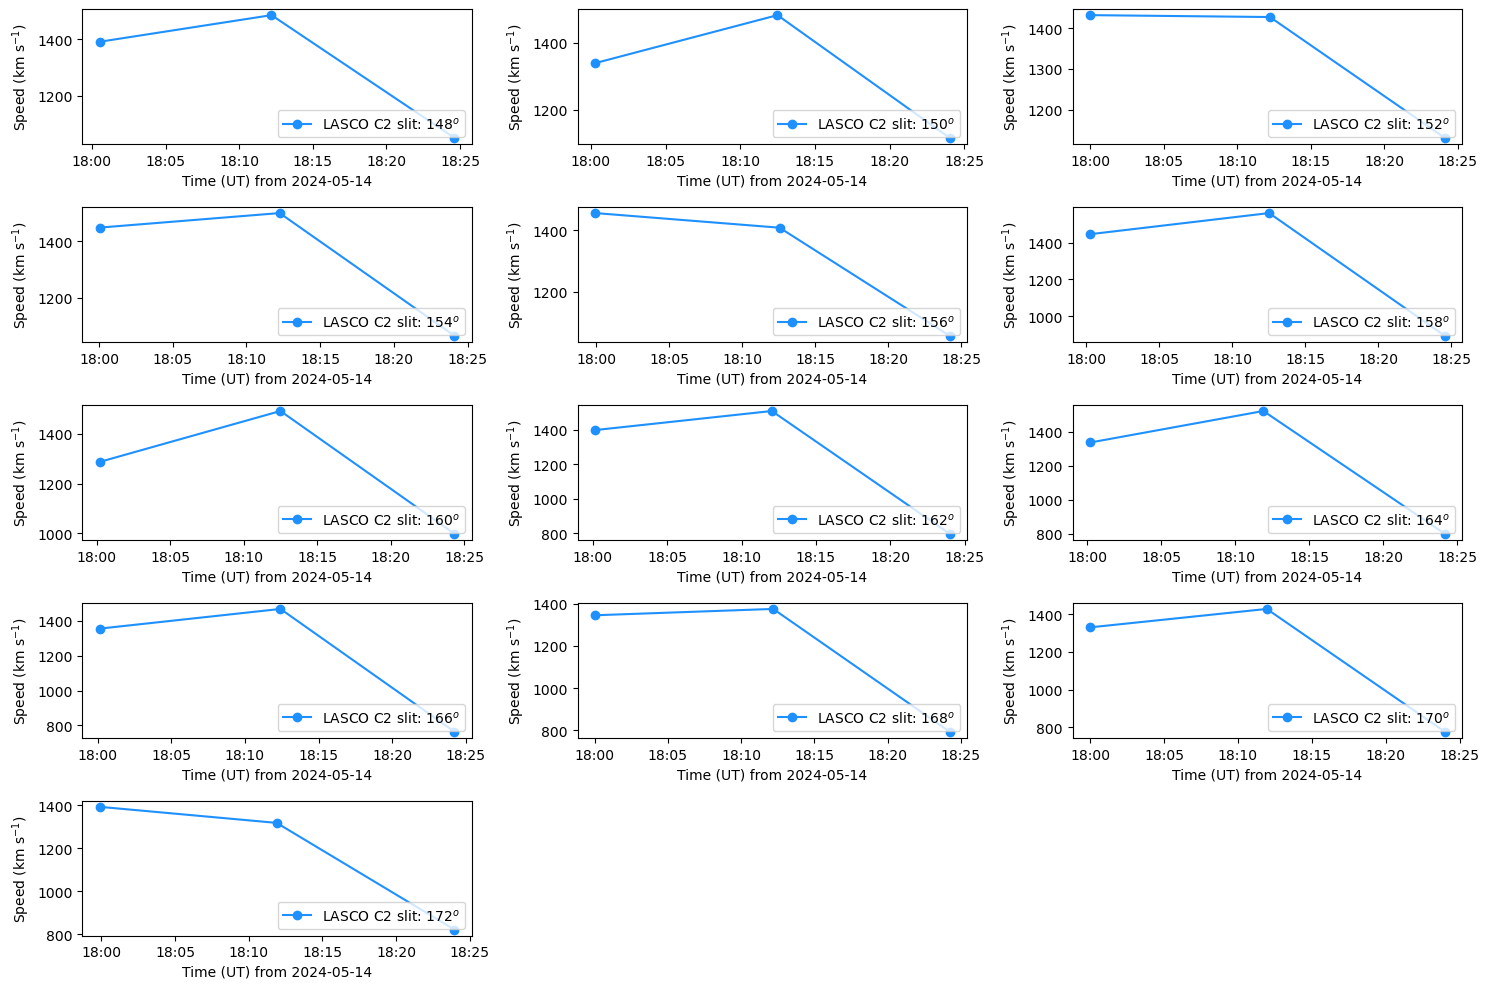

In [181]:
num_files = len(instrument_files)
cols = 3  # Number of columns in the figure
rows = (num_files // cols) + (num_files % cols > 0)  # Auto-calculate the required number of rows
bins = 10
fig, axes = plt.subplots(rows, cols, figsize=(15, 2 * rows))  # Make a grid of subplots
axes = axes.flatten()  # Flatten in case of a 2D array of axes

for i, file in enumerate(instrument_files):
    df = pd.read_csv(file)
    subdf = df[['time','speed_km_s']]
    angle = file.split('_')[-1][:-4]
    
    ax = axes[i]  # Use the i-th subplot
    ax.plot(subdf['time'], subdf['speed_km_s'], '-o', color='dodgerblue', label=f'{instrument_name} slit: {angle}$^o$')
    ax.set_xlabel(f"Time (UT) from {df['datetime'][0].split(' ')[0]}")
    ax.set_ylabel(r'Speed (km s$^{-1}$)')
    ax.legend(loc='lower right')
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Hide unused subplots if `num_files` is not a multiple of `cols`
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()

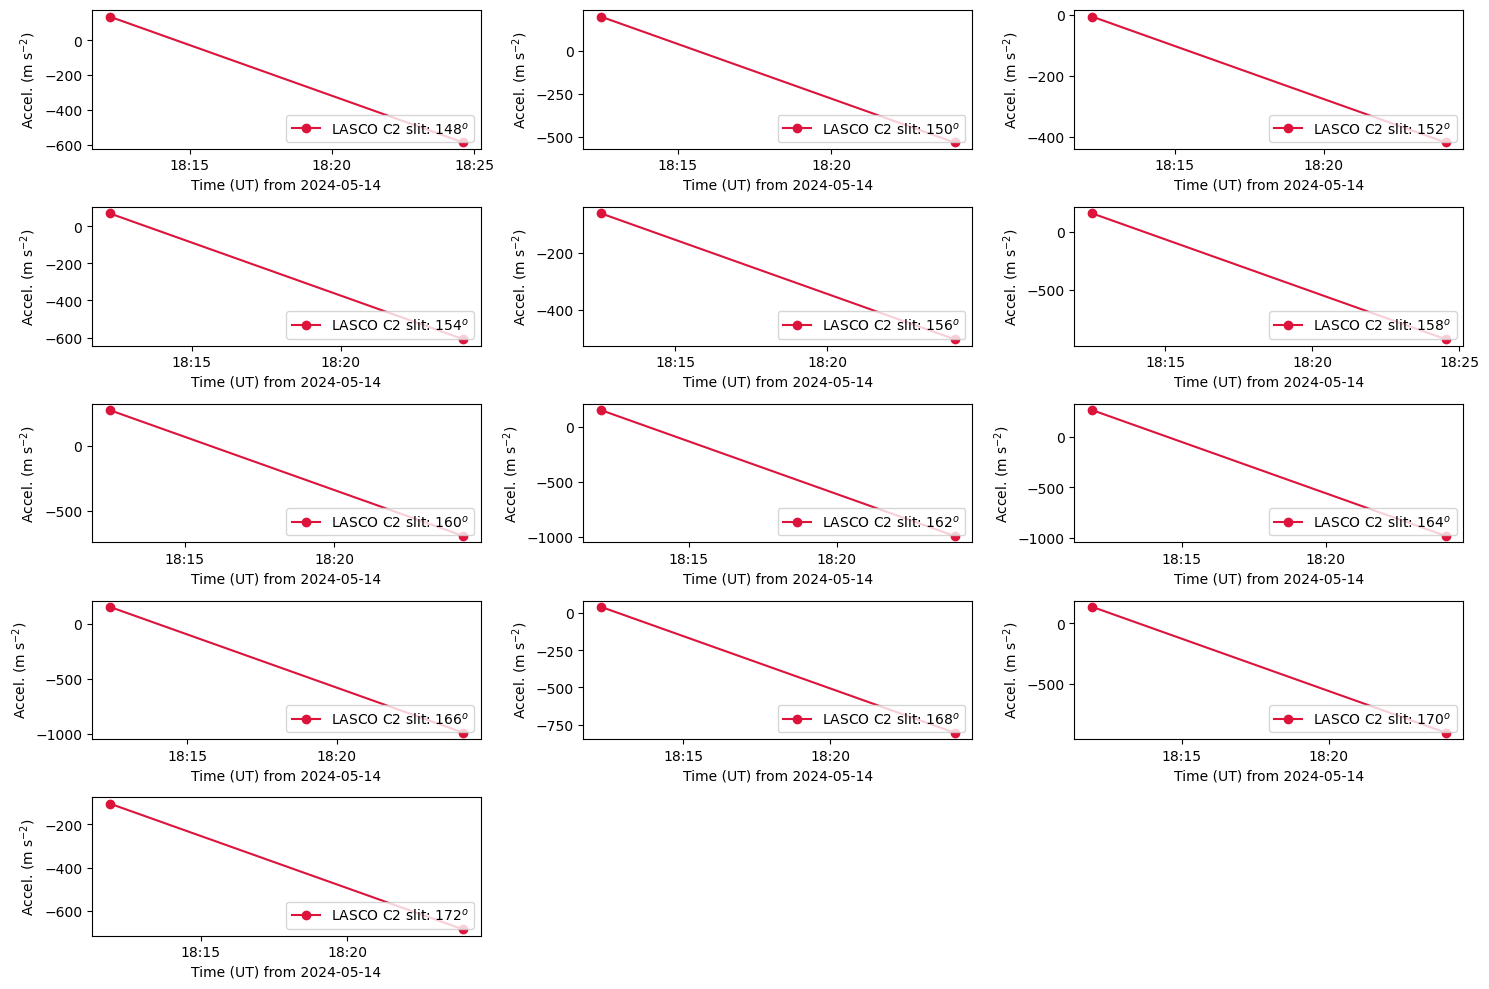

In [182]:
num_files = len(instrument_files)
cols = 3  # Number of columns in the figure
rows = (num_files // cols) + (num_files % cols > 0)  # Auto-calculate the required number of rows
bins = 10
fig, axes = plt.subplots(rows, cols, figsize=(15, 2 * rows))  # Make a grid of subplots
axes = axes.flatten()  # Flatten in case of a 2D array of axes

for i, file in enumerate(instrument_files):
    df = pd.read_csv(file)
    df['speed_diff'] = df['speed_km_s'].diff()
    df['accel_m_s2'] = (df['speed_diff'] * 1e3) / df['time_diff_s']  # Acceleration in m/s²
    subdf = df[['time','accel_m_s2']]
    angle = file.split('_')[-1][:-4]
    
    ax = axes[i]  # Use the i-th subplot
    ax.plot(subdf['time'], subdf['accel_m_s2'], '-o', color='crimson', label=f'{instrument_name} slit: {angle}$^o$')
    ax.set_xlabel(f"Time (UT) from {df['datetime'][0].split(' ')[0]}")
    ax.set_ylabel(r'Accel. (m s$^{-2}$)')
    ax.legend(loc='lower right')
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Hide unused subplots if `num_files` is not a multiple of `cols`
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()

Plot speed and accel distrubtion with slits angles

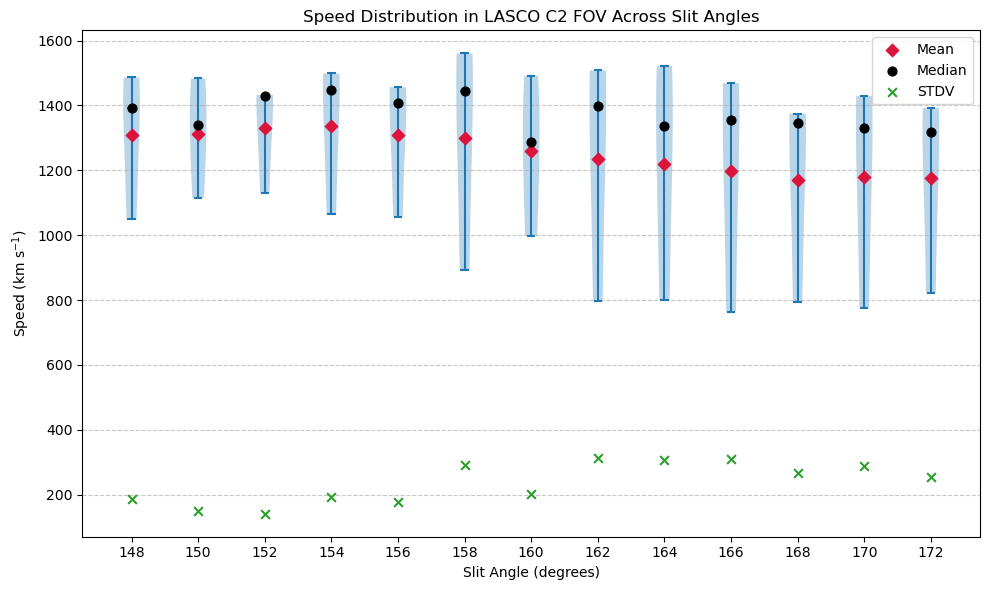

In [183]:
# Dictionary to hold speeds for each slit angle
speed_data = {}

for file in instrument_files:
    angle = file.split('_')[-1][:-4]  # Extract slit angle
    df = pd.read_csv(file)
    speed_data[angle] = df['speed_km_s'].dropna().values  # Store non-NaN speeds

# Sort by slit angle for correct x-axis ordering
sorted_slit_angles = sorted(speed_data.keys())
numeric_slit_angles = [int(angle) for angle in sorted_slit_angles]

# Prepare data for plotting
speeds_per_slit = [speed_data[angle] for angle in sorted_slit_angles]



fig, ax = plt.subplots(figsize=[10,6])

# Using a violin plot to show speed distribution per slit angle
violin_parts = ax.violinplot(speeds_per_slit, positions=numeric_slit_angles, showmedians=True)

# Plotting the means manually
mean_values = [np.nanmean(speeds) for speeds in speeds_per_slit]
ax.scatter(numeric_slit_angles, mean_values, color='crimson', marker='D', s=40, label='Mean', zorder=10)

median_values = [np.nanmedian(speeds) for speeds in speeds_per_slit]
ax.scatter(numeric_slit_angles, median_values, color='k', marker='o', s=40, label='Median', zorder=10)

std_values = [np.nanstd(speeds) for speeds in speeds_per_slit]
ax.scatter(numeric_slit_angles, std_values, color='tab:green', marker='x', s=40, label='STDV', zorder=10)

# Formatting
ax.set_xlabel('Slit Angle (degrees)')
ax.set_ylabel(r'Speed (km s$^{-1}$)')
ax.set_title(f'Speed Distribution in {instrument_name} FOV Across Slit Angles')
ax.set_xticks(numeric_slit_angles)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(loc='best')
fig.tight_layout()
plt.show()

2025-02-04 15:24:03 - matplotlib.category - INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 15:24:03 - matplotlib.category - INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


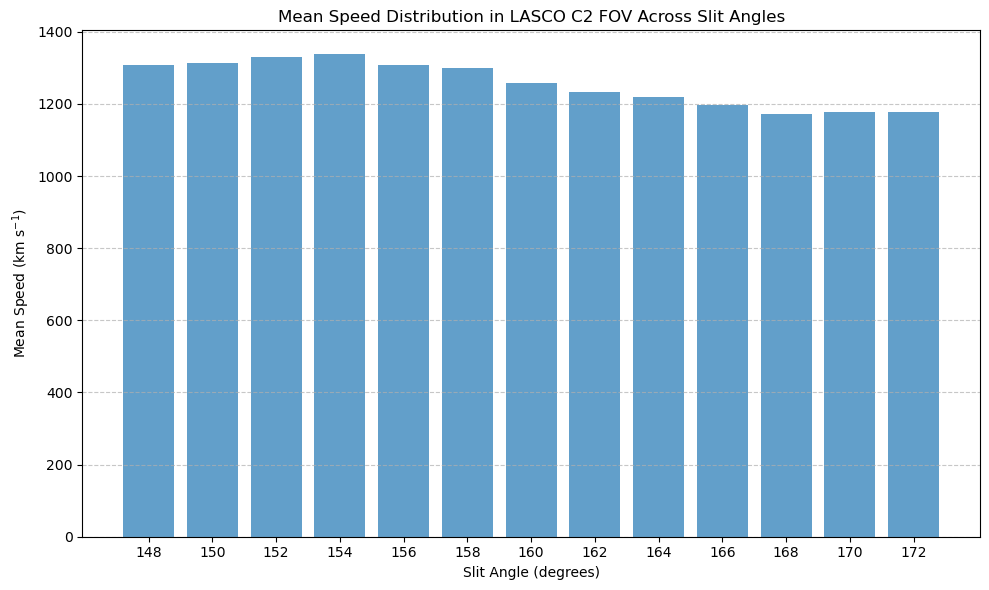

In [184]:
# Prepare data for plotting (flatten the speeds for each slit angle)
slit_angles = list(speed_data.keys())
speeds_per_slit = [speed_data[angle] for angle in slit_angles]
mean_speeds = [np.nanmean(speeds) for speeds in speeds_per_slit]

fig, ax = plt.subplots(figsize=[10,6])
ax.bar(slit_angles, mean_speeds, color='tab:blue', alpha=0.7)
ax.set_xlabel('Slit Angle (degrees)')
ax.set_ylabel(r'Mean Speed (km s$^{-1}$)')
ax.set_title(f'Mean Speed Distribution in {instrument_name} FOV Across Slit Angles')
ax.grid(axis='y', linestyle='--', alpha=0.7)
fig.tight_layout()
plt.show()

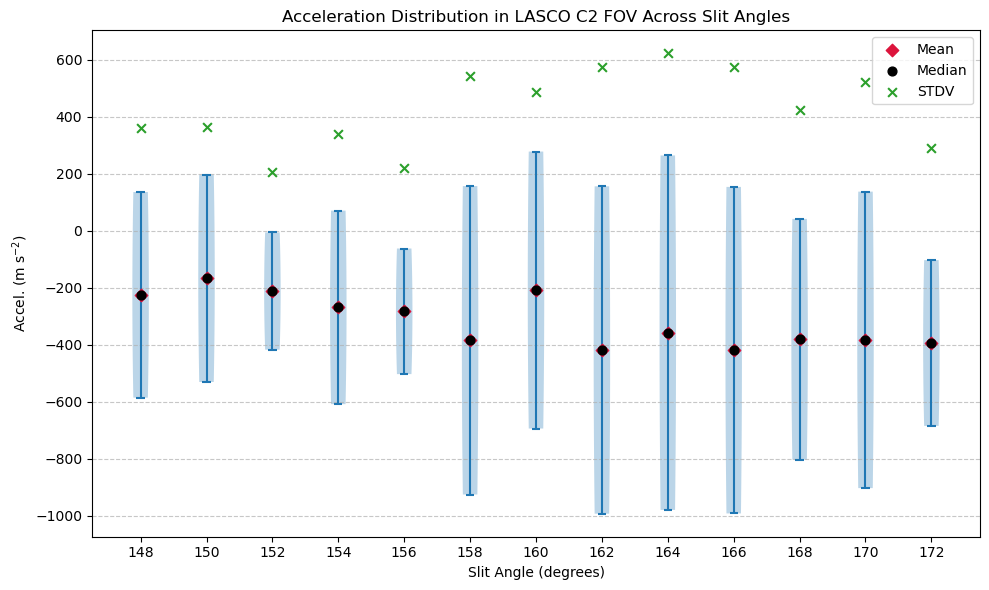

In [185]:
# Dictionary to hold accel for each slit angle
accel_data = {}

for file in instrument_files:
    angle = file.split('_')[-1][:-4]  # Extract slit angle
    df = pd.read_csv(file)
    df['speed_diff'] = df['speed_km_s'].diff()
    df['accel_m_s2'] = (df['speed_diff'] * 1e3) / df['time_diff_s']  # Acceleration in m/s²
    accel_data[angle] = df['accel_m_s2'].dropna().values  # Store non-NaN speeds

# Sort by slit angle for correct x-axis ordering
sorted_slit_angles = sorted(accel_data.keys())
numeric_slit_angles = [int(angle) for angle in sorted_slit_angles]

# Prepare data for plotting
accel_per_slit = [accel_data[angle] for angle in sorted_slit_angles]



fig, ax = plt.subplots(figsize=[10,6])

# Using a violin plot to show speed distribution per slit angle
violin_parts = ax.violinplot(accel_per_slit, positions=numeric_slit_angles, showmedians=True)

# Plotting the means manually
mean_values = [np.nanmean(accel) for accel in accel_per_slit]
ax.scatter(numeric_slit_angles, mean_values, color='crimson', marker='D', s=40, label='Mean', zorder=10)

median_values = [np.nanmedian(accel) for accel in accel_per_slit]
ax.scatter(numeric_slit_angles, median_values, color='k', marker='o', s=40, label='Median', zorder=10)

std_values = [np.nanstd(accel) for accel in accel_per_slit]
ax.scatter(numeric_slit_angles, std_values, color='tab:green', marker='x', s=40, label='STDV', zorder=10)

# Formatting
ax.set_xlabel('Slit Angle (degrees)')
ax.set_ylabel(r'Accel. (m s$^{-2}$)')
ax.set_title(f'Acceleration Distribution in {instrument_name} FOV Across Slit Angles')
ax.set_xticks(numeric_slit_angles)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(loc='best')
fig.tight_layout()
plt.show()

2025-02-04 15:24:04 - matplotlib.category - INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 15:24:04 - matplotlib.category - INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


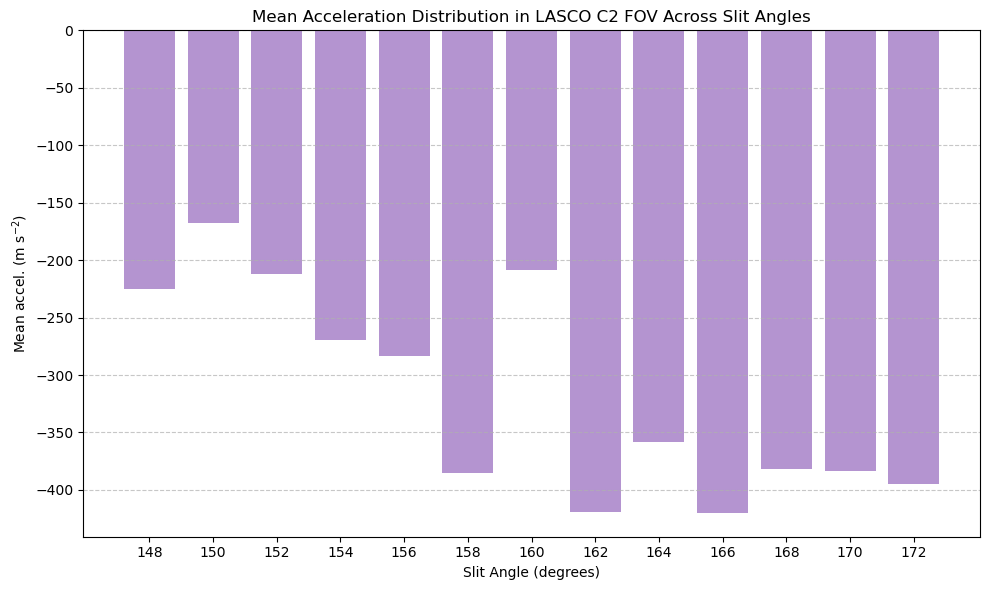

In [186]:
# Prepare data for plotting (flatten the accel for each slit angle)
slit_angles = list(accel_data.keys())
accel_per_slit = [accel_data[angle] for angle in slit_angles]
mean_accel = [np.nanmean(accel) for accel in accel_per_slit]

fig, ax = plt.subplots(figsize=[10,6])
ax.bar(slit_angles, mean_accel, color='tab:purple', alpha=0.7)
ax.set_xlabel('Slit Angle (degrees)')
ax.set_ylabel(r'Mean accel. (m s$^{-2}$)')
ax.set_title(f'Mean Acceleration Distribution in {instrument_name} FOV Across Slit Angles')
ax.grid(axis='y', linestyle='--', alpha=0.7)
fig.tight_layout()
plt.show()

In [204]:
number = .347
print(round(number, 2))

0.35
